# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ta`u
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | codajas
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | lihue
Processing Record 6 of Set 1 | enewetak
Processing Record 7 of Set 1 | usogorsk
Processing Record 8 of Set 1 | placido de castro
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | acapulco de juarez
Processing Record 11 of Set 1 | mata-utu
Processing Record 12 of Set 1 | haiku-pauwela
Processing Record 13 of Set 1 | kuusamo
Processing Record 14 of Set 1 | rabo de peixe
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | ouellah
City not found. Skipp

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ta`u,-14.2336,-169.5144,26.82,74,36,6.69,AS,1726803833
1,hasaki,35.7333,140.8333,29.46,77,23,4.46,JP,1726803834
2,codajas,-3.8367,-62.0569,28.01,44,95,0.39,BR,1726803835
3,edinburgh of the seven seas,-37.0676,-12.3116,13.56,87,100,9.81,SH,1726803836
4,lihue,21.9789,-159.3672,27.77,68,20,5.66,US,1726803837


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,26.82,74,36,6.69,AS,1726803833
1,hasaki,35.7333,140.8333,29.46,77,23,4.46,JP,1726803834
2,codajas,-3.8367,-62.0569,28.01,44,95,0.39,BR,1726803835
3,edinburgh of the seven seas,-37.0676,-12.3116,13.56,87,100,9.81,SH,1726803836
4,lihue,21.9789,-159.3672,27.77,68,20,5.66,US,1726803837


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

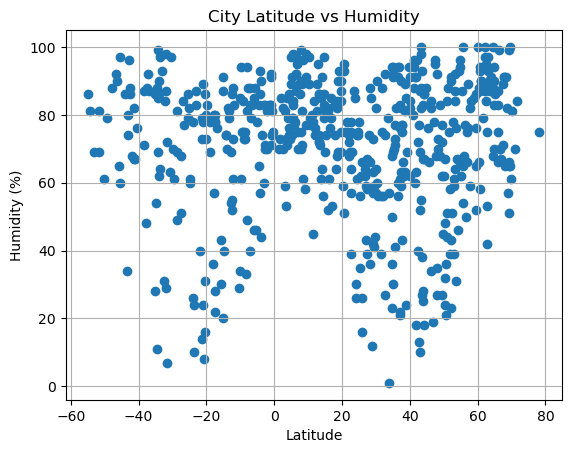

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

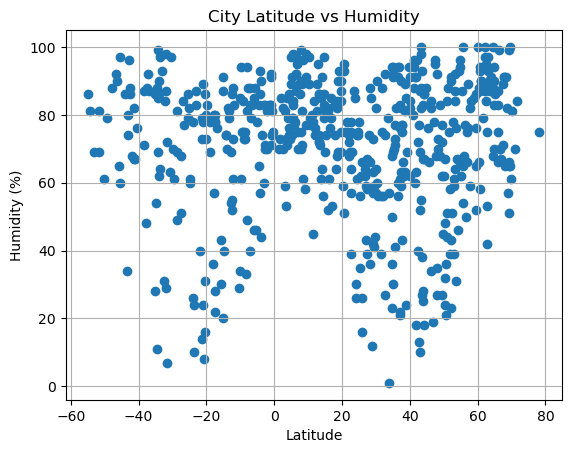

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

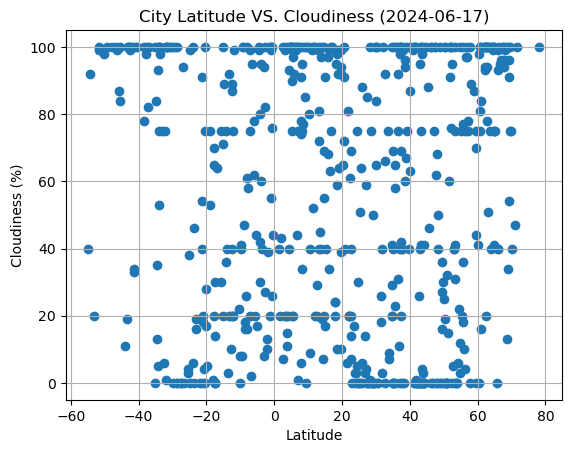

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude VS. Cloudiness (2024-06-17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

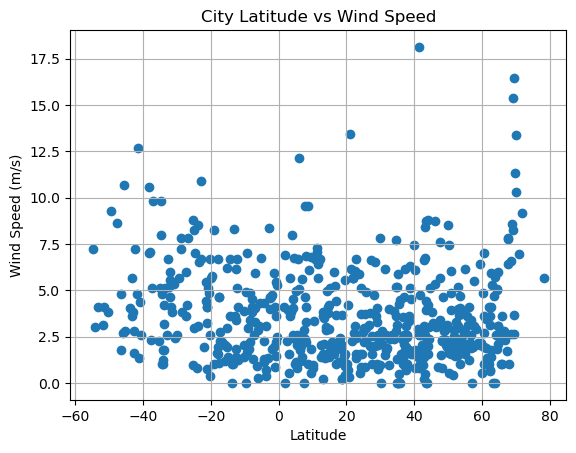

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x +{round(intercept,2)}"

    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_value, 'r-')
    plt.annotate(line_eq, text_coord, fontsize=15, color = 'r')
    plt.xlabel('lat')
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()




In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hasaki,35.7333,140.8333,29.46,77,23,4.46,JP,1726803834
4,lihue,21.9789,-159.3672,27.77,68,20,5.66,US,1726803837
5,enewetak,11.3474,162.3373,28.82,78,100,7.26,MH,1726803838
6,usogorsk,63.4106,48.6872,10.61,90,100,4.68,RU,1726803839
9,acapulco de juarez,16.8634,-99.8901,28.90,79,75,1.03,MX,1726803843


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,26.82,74,36,6.69,AS,1726803833
2,codajas,-3.8367,-62.0569,28.01,44,95,0.39,BR,1726803835
3,edinburgh of the seven seas,-37.0676,-12.3116,13.56,87,100,9.81,SH,1726803836
7,placido de castro,-10.3353,-67.1856,29.08,29,22,1.40,BR,1726803841
8,port-aux-francais,-49.3500,70.2167,3.21,79,100,9.25,TF,1726803733


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7153755225431909


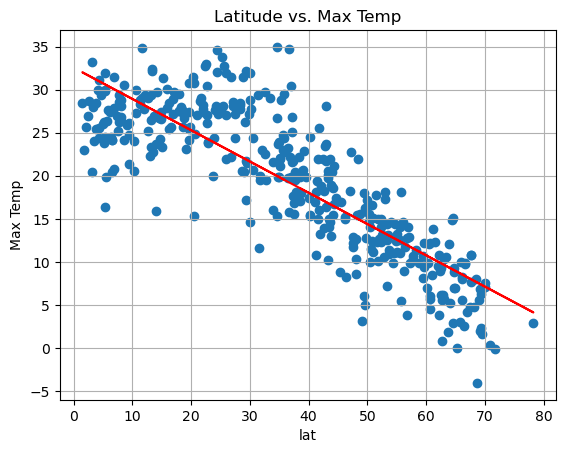

In [15]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.title(f"Latitude vs. Max Temp")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Max Temp', (6, -10))


The r-value is 0.5327969479196828


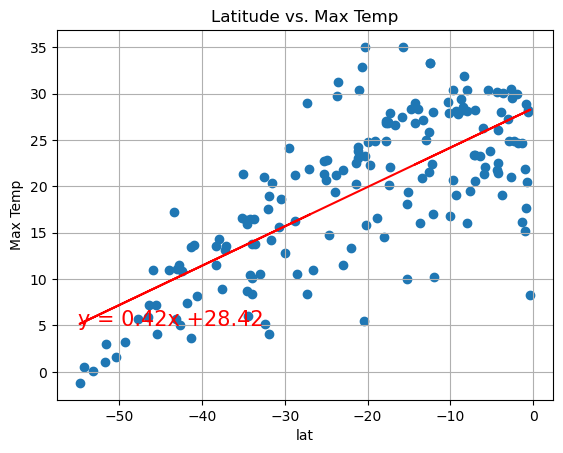

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.title(f"Latitude vs. Max Temp")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Max Temp',(-55, 5))

**Discussion about the linear relationship:** 
The maximum temperature demonstrates a significant negative linear relationship with latitude in the Northern Hemisphere, evidenced by an approximate r-value of -0.72 for the linear best-fit regression line.

Conversely, in the Southern Hemisphere, the maximum temperature exhibits a notable positive linear relationship with latitude, with an approximate r-value of 0.41 for the linear best-fit regression line.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.001559416889104233


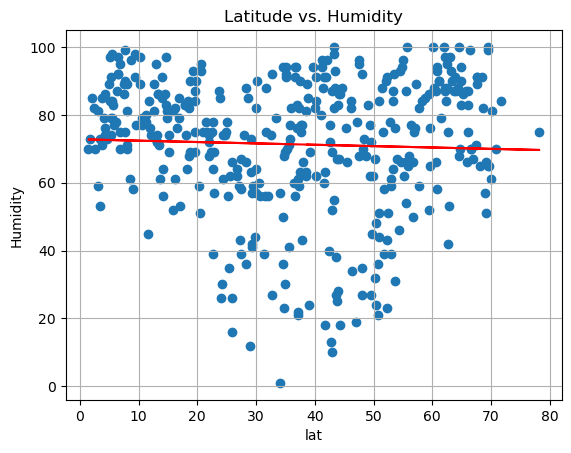

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.title(f"Latitude vs. Humidity")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Humidity',(6, -10))

The r-value is 0.5327969479196828


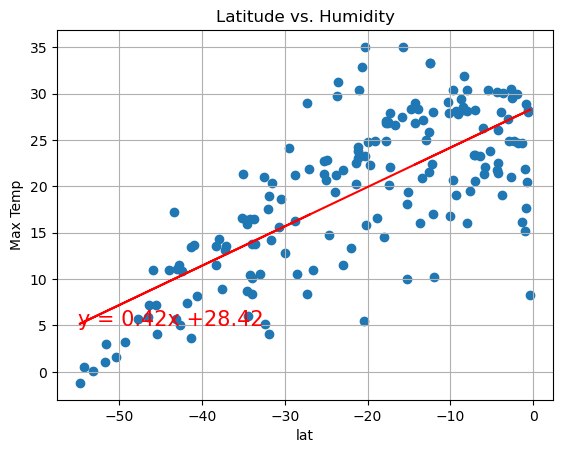

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.title(f"Latitude vs. Humidity")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Max Temp',(-55, 5))

**Discussion about the linear relationship:** 
Humidity exhibits a mild positive linear relationship with latitude in the Northern Hemisphere, indicated by an approximate r-value of 0.06.

In contrast, the Southern Hemisphere shows a more pronounced positive linear relationship between humidity and latitude, with an approximate r-value of 0.41.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.001559416889104233


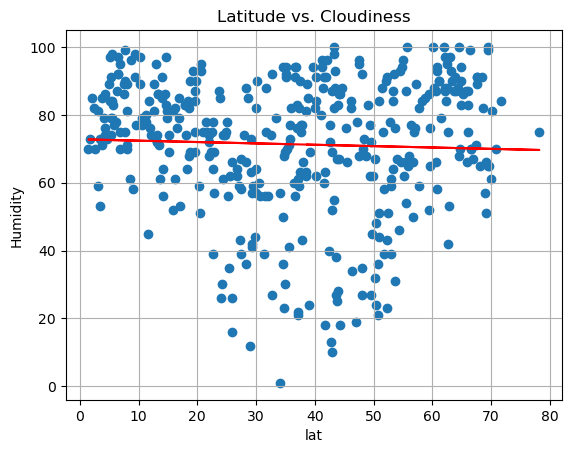

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.title(f"Latitude vs. Cloudiness")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Humidity',(6, -10))

The r-value is 0.5327969479196828


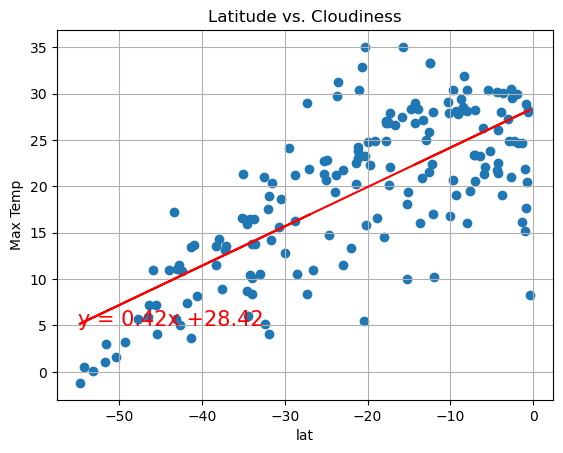

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.title(f"Latitude vs. Cloudiness")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Max Temp',(-55, 5))

**Discussion about the linear relationship:** There is no significant relationship between cloudiness and latitude in the Northern Hemisphere. However, in the Southern Hemisphere, a very strong positive relationship between cloudiness and latitude is observed.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.001559416889104233


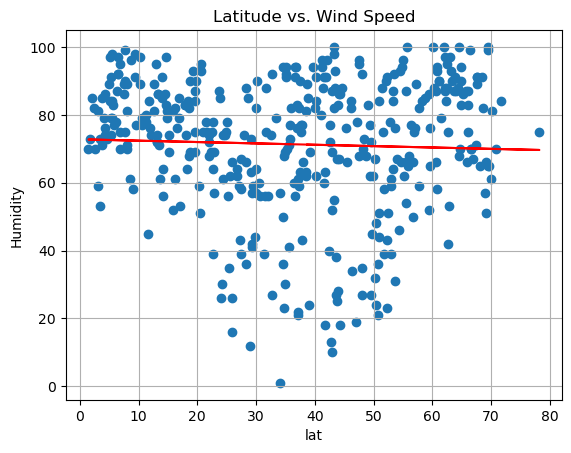

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.title(f"Latitude vs. Wind Speed")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Humidity',(6, -10))

The r-value is 0.5327969479196828


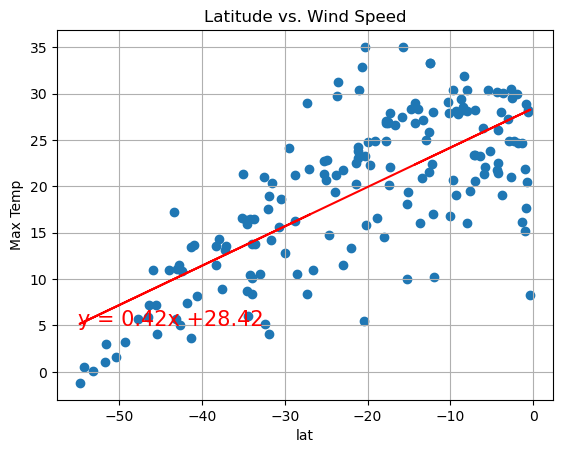

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.title(f"Latitude vs. Wind Speed")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Max Temp',(-55, 5))

**Discussion about the linear relationship:** In the Northern Hemisphere, there is no strong relationship between cloudiness and latitude. In contrast, the Southern Hemisphere exhibits a very strong positive relationship between cloudiness and latitude.